In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [5]:
# import created data from Load Data 
feature_training = pickle.load(open("x_training.pickle", "rb"))
label_training = pickle.load(open("y_training.pickle", "rb"))

feature_test = pickle.load(open("x_test.pickle", "rb"))
label_test = pickle.load(open("y_test.pickle", "rb"))

# Decrease size of RGB for better working 
feature_training = feature_training/255.0
feature_test = feature_test/255.0

In [49]:
# Create model
model = Sequential() 

# Conv operations
model.add(Conv2D(64, (3,3), input_shape= feature_training.shape[1:])) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())

# Hidden layers
model.add(Dense(128)) 
model.add(Activation("relu"))

model.add(Dense(128)) 
model.add(Activation("relu"))

# Output player
model.add(Dense(3)) 
model.add(Activation('softmax'))

# training process
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(feature_training, label_training, epochs=5, validation_split=0.1)

Train on 48 samples, validate on 6 samples
Epoch 1/5
48/48 [==============================] - 1s 15ms/sample - loss: 1.1157 - accuracy: 0.2708 - val_loss: 0.8701 - val_accuracy: 0.6667
Epoch 2/5
48/48 [==============================] - 0s 10ms/sample - loss: 1.1517 - accuracy: 0.3750 - val_loss: 0.8788 - val_accuracy: 0.5000
Epoch 3/5
48/48 [==============================] - 1s 11ms/sample - loss: 0.7036 - accuracy: 0.6875 - val_loss: 0.6184 - val_accuracy: 0.6667
Epoch 4/5
48/48 [==============================] - 0s 10ms/sample - loss: 0.5053 - accuracy: 0.8333 - val_loss: 0.4237 - val_accuracy: 0.8333
Epoch 5/5
48/48 [==============================] - 1s 11ms/sample - loss: 0.2865 - accuracy: 0.9375 - val_loss: 0.2653 - val_accuracy: 0.8333


In [42]:
# test data
prediction = model.predict(feature_test)

In [51]:
# show raw predicted data
import numpy as np
print(prediction[0])
print(np.argmax(prediction[0]))

[0.00650094 0.9914386  0.00206038]
1


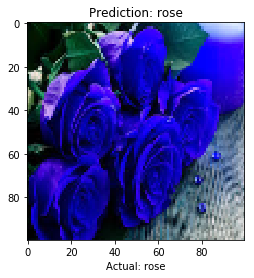

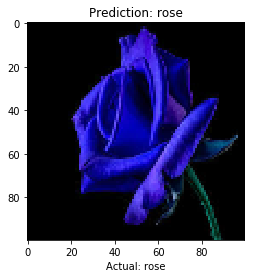

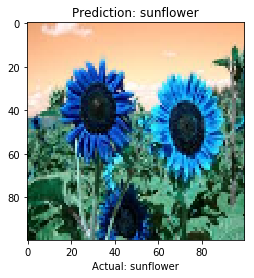

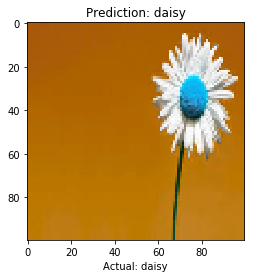

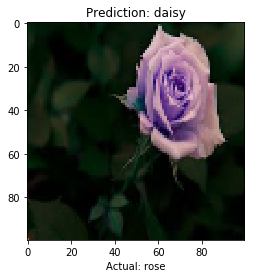

In [44]:
# show predicted data using matplotlib (picture are ble cause openCV uses BGR not RGB)
import matplotlib.pyplot as plt
CATEGORIES = ["daisy", "rose", "sunflower"]
for i in range(5):
    plt.grid(False)
    plt.imshow(feature_test[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + CATEGORIES[label_test[i]])
    plt.title("Prediction: " + CATEGORIES[np.argmax(prediction[i])])
    plt.show()